## Lesson 2C - Sarcasm dataset with 1D Convolutional Layer

In [1]:
!pip install tensorflow==2.0.0-beta1

In [2]:
import json
import tensorflow as tf

print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2019-09-23 03:52:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2019-09-23 03:52:24 (36.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [0]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

In [0]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0 : training_size]
testing_sentences = sentences[training_size :]

training_labels = labels[0 : training_size]
testing_labels = labels[training_size : ]

In [0]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_length,
                                padding = padding_type,
                                truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                               maxlen = max_length,
                               padding = padding_type,
                               truncating = trunc_type)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              input_length = max_length),
    tf.keras.layers.Conv1D(128, 5, activation = 'relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [12]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 50

history = model.fit(training_padded, training_labels,
                    epochs = num_epochs,
                    validation_data = (testing_padded, testing_labels),
                    verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 [==============================] - 9s 468us/sample - loss: 0.4773 - accuracy: 0.7538 - val_loss: 0.4067 - val_accuracy: 0.8146
Epoch 2/50
20000/20000 [==============================] - 9s 462us/sample - loss: 0.3621 - accuracy: 0.8363 - val_loss: 0.3908 - val_accuracy: 0.8223
Epoch 3/50
20000/20000 [==============================] - 9s 466us/sample - loss: 0.3218 - accuracy: 0.8592 - val_loss: 0.3890 - val_accuracy: 0.8235
Epoch 4/50
20000/20000 [==============================] - 9s 467us/sample - loss: 0.2882 - accuracy: 0.8741 - val_loss: 0.3948 - val_accuracy: 0.8258
Epoch 5/50
20000/20000 [==============================] - 9s 462us/sample - loss: 0.2576 - accuracy: 0.8896 - val_loss: 0.4228 - val_accuracy: 0.8201
Epoch 6/50
20000/20000 [==============================] - 9s 468us/sample - loss: 0.2252 - accuracy: 0.9075

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

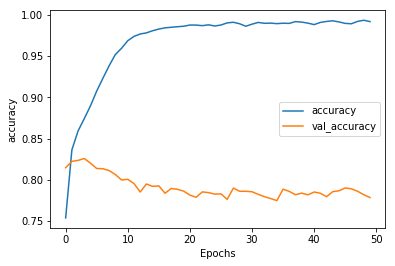

In [15]:
plot_graphs(history, 'accuracy')

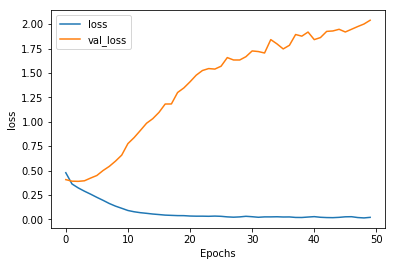

In [16]:
plot_graphs(history, 'loss')

In [0]:
model.save("C3_W3_L2c.h5")